# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_nonorm.csv"
paths.gen_1_path <- "../data/gen_prof_10000.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,P1.3.A3,P1.3.B10,P1.3.B12,P1.3.B2,P1.3.B8,P1.3.D1,P1.3.D12,P1.3.D9,P1.3.E1,P1.3.E4,⋯,GHA501A41,GHA501A47,GHA501A48,GHA501A54,GHA501A69,GHA501A70,GHA501A72,GHA501A74,GHA501A83,GHA501A93
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.703765,0.000000,0.000000,5.227279,4.800641,0.0000000,0.0000000,0.000000,⋯,0.5448804,0.7823517,0.6369969,2.175254,0.000000,1.7801001,3.801378,0.7655439,0.000000,3.4088070
Cd47,0.000000,3.196922,5.099716,2.918386,5.226123,0.000000,3.658783,3.0373822,0.0000000,7.142720,⋯,2.7807633,8.4777158,9.2550843,8.408633,6.871060,9.2950091,4.947373,8.5891534,9.918273,9.7571295
Elmo2,8.091382,5.988912,6.964745,4.581351,6.436295,4.409391,4.185867,4.3490821,0.3561438,7.410918,⋯,5.6864396,0.7812074,0.0000000,2.647312,0.000000,0.5416181,0.000000,3.9701527,2.691955,1.6911530
Crip2,7.533408,0.000000,3.824768,0.000000,0.000000,0.000000,0.000000,5.8872816,3.7516779,0.000000,⋯,8.1795533,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.9078236,0.000000,0.0000000
Pprc1,0.000000,2.914565,4.851999,5.107269,3.198494,4.257765,5.157044,0.0000000,0.4114262,3.766595,⋯,0.3990446,2.5846768,0.0000000,3.723433,4.377274,0.2765536,3.884531,0.3138547,0.000000,0.5628152
Ccdc174,0.000000,2.704872,2.817623,3.266037,4.399855,4.531693,3.204767,0.6322682,1.7355222,0.000000,⋯,1.4413852,1.7464567,1.0269647,4.373164,4.417183,5.3613503,0.000000,0.0000000,5.389610,1.6996514


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep10000_0,gencell_ep10000_1,gencell_ep10000_2,gencell_ep10000_3,gencell_ep10000_4,gencell_ep10000_5,gencell_ep10000_6,gencell_ep10000_7,gencell_ep10000_8,gencell_ep10000_9,⋯,gencell_ep10000_490,gencell_ep10000_491,gencell_ep10000_492,gencell_ep10000_493,gencell_ep10000_494,gencell_ep10000_495,gencell_ep10000_496,gencell_ep10000_497,gencell_ep10000_498,gencell_ep10000_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,8.545792,7.753170,8.999966,8.071694,7.908792,8.723294,8.147902,8.244991,7.853307,7.472249,⋯,7.943613,8.979317,8.287340,7.587375,8.243751,7.972455,7.789615,6.722155,8.163955,8.000280
Cd47,5.246065,4.775654,5.675411,4.524938,4.747410,4.907802,5.059869,5.154300,5.003039,4.723737,⋯,5.280425,5.790921,4.882285,4.993361,4.767479,5.100693,4.773083,4.280551,5.012825,5.053850
Elmo2,14.793579,13.241647,15.822949,13.291033,13.515327,14.936366,14.470753,14.156573,13.332355,12.267495,⋯,14.141752,15.913518,14.106221,13.436642,13.811872,13.446499,13.198027,11.282054,14.216779,13.495495
Crip2,6.451704,6.126768,6.542956,5.802965,6.123579,6.468832,6.167658,6.259717,5.793207,5.671467,⋯,6.266164,6.671032,6.100003,6.032680,6.216522,5.954073,6.072031,5.318564,6.224719,6.422151
Pprc1,8.979231,8.318203,9.265272,8.151425,7.877250,9.216417,8.779938,8.689090,8.030222,7.486990,⋯,8.565723,9.796384,8.647357,8.182036,8.654408,8.195405,8.251863,7.213532,8.729248,8.514601
Ccdc174,2.872483,2.736507,2.636832,2.503115,2.677184,2.655913,2.749673,2.639866,2.684239,2.664510,⋯,2.639359,2.869967,2.585278,2.601096,2.618653,2.566010,2.505520,2.609826,2.695806,2.594680


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

PC_ 1 
Positive:  Rplp1, Rps29, Rps3a1, B2m, Sdc4, Rpl39, Rpl35, Cst3, Anxa2, Anxa8 
	   Hspb1, Tmsb4x, Perp, Klf4, Rpl4, Sbsn, Dmkn, S100a11, Anxa1, Fam25c 
	   Krt15, Krt10, Krtdap, Mif, H3f3a, Nfkbia, Ly6g6c, Lgals7, Sfn, Calm4 
Negative:  Psg16, Fgd4, Zan, Fads1, Wdr31, Maz, Uhmk1, Zfp940, Cybrd1, Sympk 
	   Dtnb, Cmah, Supt20, Mgat5, Lpcat1, Ttyh3, Kif24, Tnks, Tubgcp4, Scarb1 
	   Uty, Ptpn4, Tfdp1, Arhgap39, Tonsl, Lhfp, Brca2, Psd3, Ttll5, Dhtkd1 
PC_ 2 
Positive:  Tnfrsf10b, Rbm48, Hmmr, Ccdc84, Glipr1, Cand2, Ybey, Zfhx3, Rab31, Dynlt1a 
	   Pgm2, Ly6a, Pex1, Gm5148, Tes, Map1b, Gpr137b, Frs2, Ppm1k, Dpysl2 
	   Impact, Bnip3, Rhoc, Galk1, 4930579G24Rik, Dse, Pdpn, Spc24, Ubxn8, Lgals1 
Negative:  Apoe, Macf1, Rpl35a, Lgals7, Nfe2l1, Fgfr2, Sptan1, Ptbp1, Ncor2, Rpl19 
	   Uba52, Atp13a2, Rnf44, Dmd, Hnrnpf, Limk2, Tecr, Rnpepl1, Nhsl1, Bcam 
	   Raly, Epn1, Plxnb2, Sgk3, Btbd11, Smarcd2, Fam168b, Camta1, Tomm6, Cdh3 
PC_ 3 
Positive:  Hal, Skint6, Ephx3, Ankrd35, Psapl1, Orm

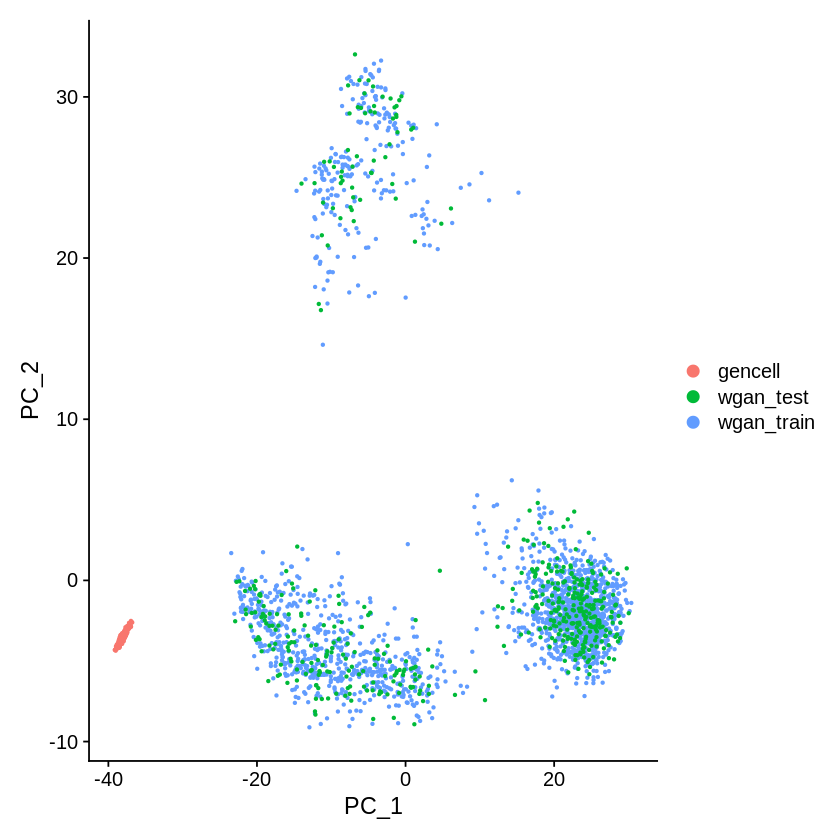

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

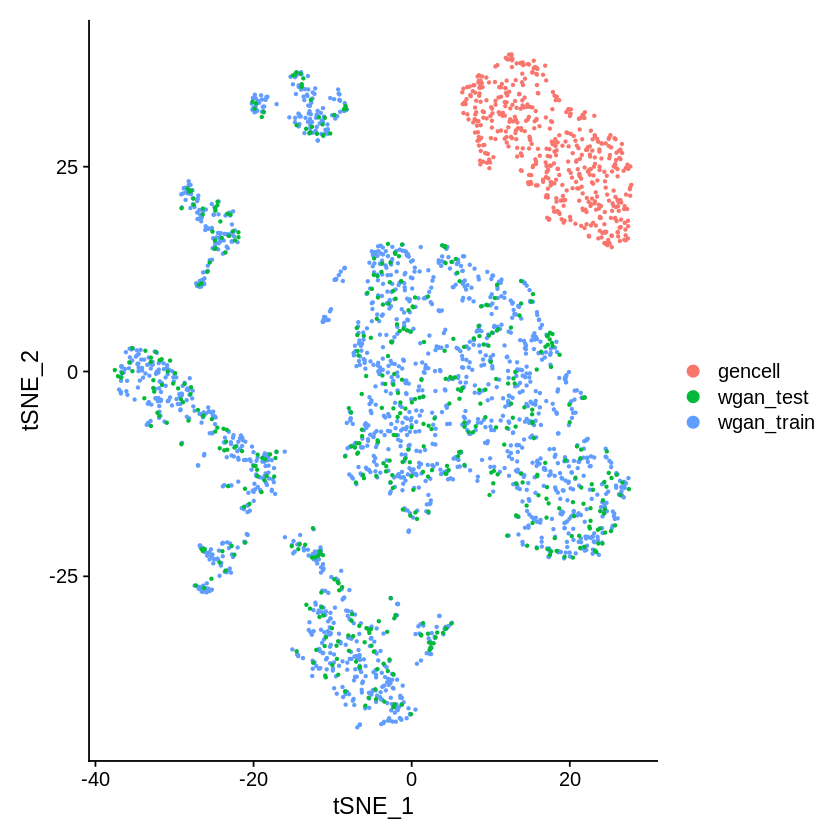

In [19]:
DimPlot(data_combined, reduction = "tsne")